・ポルトガル語コースのデータの要約統計量を表示する．

・数学コースのデータとポルトガル語コースのデータをマージする．（マージするキーは，school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, nursery, internet）．
どちらのデータかわかるように，suffixes=('_math', '_por')のパラメータを追加すること．

・マージしたデータで，Medu， Fedu， G3_math等のデータをいくつかピックアップして散布図とヒストグラムを作成する．（最低一つずつ）

In [46]:
# 配列処理や数値計算
import numpy as np

# 統計処理
import scipy as sp
import statistics
from scipy import stats

# データ加工
import pandas as pd

# 可視化
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
pd.set_option('display.max_columns', 100)
df_por = pd.read_csv('./student/student-por.csv',sep = ';')
df_mat = pd.read_csv('./student/student-mat.csv',sep = ';')

In [48]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [49]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [50]:
df_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [51]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [191]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [102]:
df = pd.merge(df_mat, df_por,how = 'inner',on = ["school", "sex", "age", "address", "famsize", 
                                                 "Pstatus","Medu", "Fedu", "Mjob", "Fjob",
                                                 "reason", "nursery", "internet"],
              suffixes=('_math', '_por'))

In [103]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_math,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery,higher_math,internet,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13


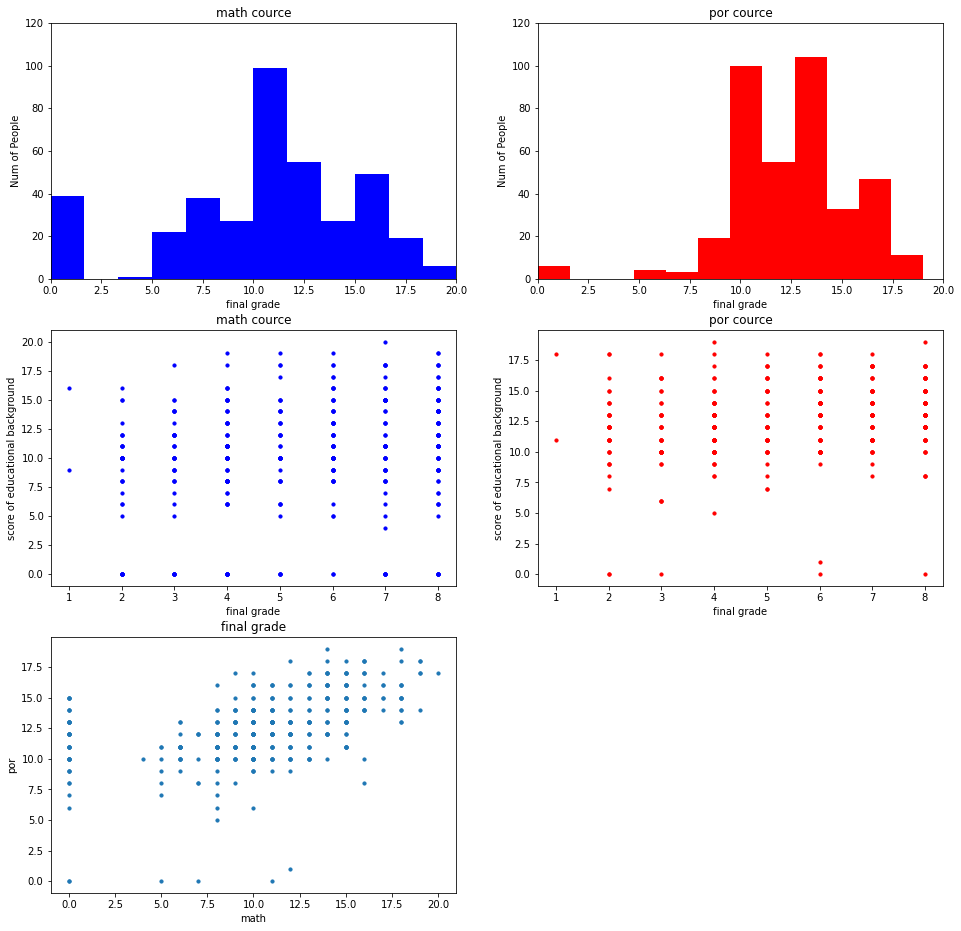

In [220]:
t1 = df['G3_math']
t2 = df['G3_por']
t3 = df['Medu']
t4 = df['Fedu']
t5 = t3+t4

#fig = plt.figure()
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)

ax1.hist(t1,histtype='bar',color = 'blue',bins=12,rwidth=2)
ax1.set_title('math cource')
ax1.axis([0.0,20,0.0,120])
ax1.set_xlabel('final grade')
ax1.set_ylabel('Num of People')

ax2.hist(t2,histtype='bar',color = 'red',bins=12,rwidth=2)
ax2.axis([0.0,20,0.0,120])
ax2.set_title('por cource')
ax2.set_xlabel('final grade')
ax2.set_ylabel('Num of People')

ax3.scatter(t5,t1,s=10,color = 'blue')
#ax3.axis([0.0,20,0.0,20])
ax3.set_title('math cource')
ax3.set_xlabel('final grade')
ax3.set_ylabel('score of educational background')

ax4.scatter(t5,t2,s=10,color = 'red')
#ax3.axis([0.0,20,0.0,20])
ax4.set_title('por cource')
ax4.set_xlabel('final grade')
ax4.set_ylabel('score of educational background')

ax5.scatter(t1,t2,s=10)
#ax3.axis([0.0,20,0.0,20])
ax5.set_title('final grade')
ax5.set_xlabel('math')
ax5.set_ylabel('por')

plt.show()

In [221]:
coef_math = np.corrcoef(t1, t5)
coef_por = np.corrcoef(t2, t5)
coef_edu = np.corrcoef(t1, t2)
print(coef_math)
print(coef_por)
print(coef_edu)

[[1.         0.19857462]
 [0.19857462 1.        ]]
[[1.         0.20667401]
 [0.20667401 1.        ]]
[[1.         0.48034936]
 [0.48034936 1.        ]]
